In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, spatial
import os
import urllib
import frigidum
from frigidum.examples import tsp
import seaborn as sns
from python_tsp.heuristics import solve_tsp_simulated_annealing


/home/mrk/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

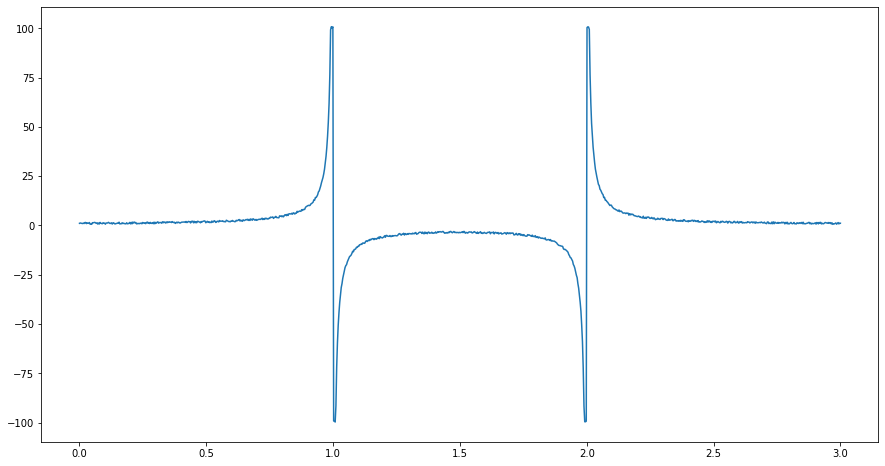

In [12]:
eps = 0.0001
np.random.seed(0)

delta = np.random.rand(1001)

def target_function(x):
    return 1 / ( x**2 - 3*x + 2 )

x = np.linspace(0, 3, 1001)
y = np.zeros(1001)
for i, xi in enumerate(x):
    f_x = target_function(xi)
    if f_x < -100:
        y[i] = -100 + delta[i]
    elif -100 <= f_x <= 100:
        y[i] = f_x + delta[i]
    else:
        y[i] = 100 + delta[i]
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# sns.set_context("talk")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.lineplot(x, y, )

In [14]:
def get_cost_func_value(params, value, x):
    a, b, c, d = params

    return sum((value - extended_rational(x, a, b, c, d))**2)


def get_cost_func_vect(params, value, x):
    a, b, c, d = params

    return (value - extended_rational(x, a, b, c, d))


In [15]:
def extended_rational(x, a, b, c, d):
    return (a*x + b) / (x**2 + c * x + d)


def squared_diff(params, x, y, func):
    return np.sum((func(x, *params) - y)**2)

    

/home/mrk/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mrk/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mrk/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mrk/.local

<AxesSubplot:>

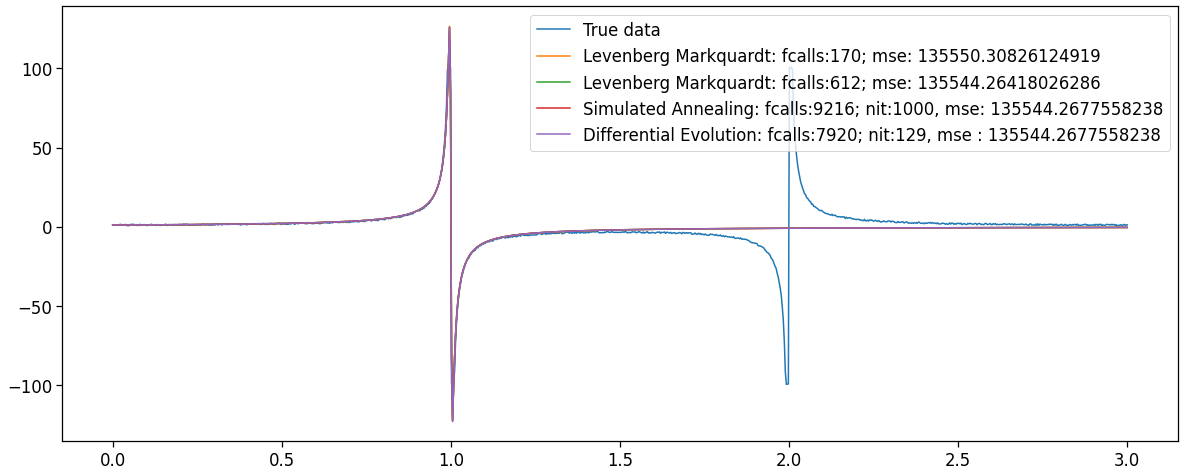

In [23]:
start = (0.5, 0.5, 0.5, 0.5)


params_lma = optimize.least_squares(get_cost_func_vect,
                                     x0 = start,
                                     args=(y, x),
                                     method='lm',
                                     ftol=eps)


params_nm= optimize.minimize(get_cost_func_value, 
                             x0 = start,
                             args=(y, x),
                             method='Nelder-Mead',
                             tol=eps)
                             
params_anneal = optimize.dual_annealing(get_cost_func_value,
                                        ((-5, 5), (-5, 5), (-5, 5), (-5, 5)),
                                        args=(y, x))
params_evol = optimize.differential_evolution(get_cost_func_value, ((-5, 5), (-5, 5), (-5, 5), (-5, 5)), args=(y, x), tol=eps)


plt.figure(figsize=(20, 8))
sns.lineplot(x,y, palette= 'deep',label='True data')
sns.lineplot(x,extended_rational(x, *params_lma.x), label = f'Levenberg Markquardt: fcalls:{params_lma.nfev}; mse: {squared_diff(params_lma.x, x,y,extended_rational)}')
sns.lineplot(x,extended_rational(x, *params_nm.x), label = f'Levenberg Markquardt: fcalls:{params_nm.nfev}; mse: {params_nm.fun}')

sns.lineplot(x, extended_rational(x, *params_anneal.x),  label = f'Simulated Annealing: fcalls:{params_anneal.nfev}; nit:{params_anneal.nit}, mse: {params_anneal.fun}')
sns.lineplot(x, extended_rational(x, *params_evol.x),  label = f'Differential Evolution: fcalls:{params_evol.nfev}; nit:{params_evol.nit}, mse : {params_anneal.fun}')
# plt.legend()

In [38]:
filename = 'dataset.tsp'
link = 'https://people.sc.fsu.edu/~jburkardt/datasets/tsp/atst48.tsp'
# urllib.request.urlretrieve(link, filename)

with open(filename) as _:
    data = _.readlines()[6:54]
    data = [[line.strip().split()[0], line.strip().split()[1]] for line in data[:-1]]
    data = np.array(data, dtype=float)


dist_matrix = spatial.distance.squareform(spatial.distance.pdist(data))


/home/mrk/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


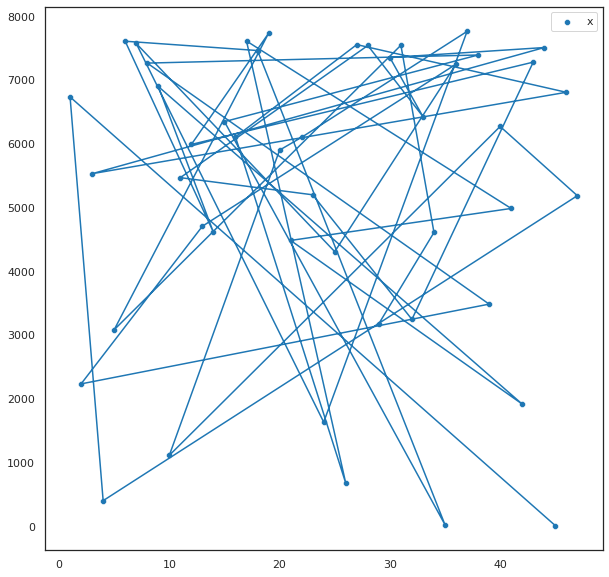

In [60]:
random_ = np.arange(0, data.shape[0])
np.random.seed(0)
np.random.shuffle(random_)

sns.set_theme(style="white", palette=None)

plt.figure(figsize=(10, 10))
sns.scatterplot(data[:, 0][random_], data[:, 1][random_], label='x' )
plt.plot(data[:, 0][random_], data[:, 1][random_], label = 'y')

In [62]:
permutation, distance = solve_tsp_simulated_annealing(dist_matrix,log_file='./logs.txt')


In [61]:
distance

15532.222115986106

Text(0, 0.5, 'y')

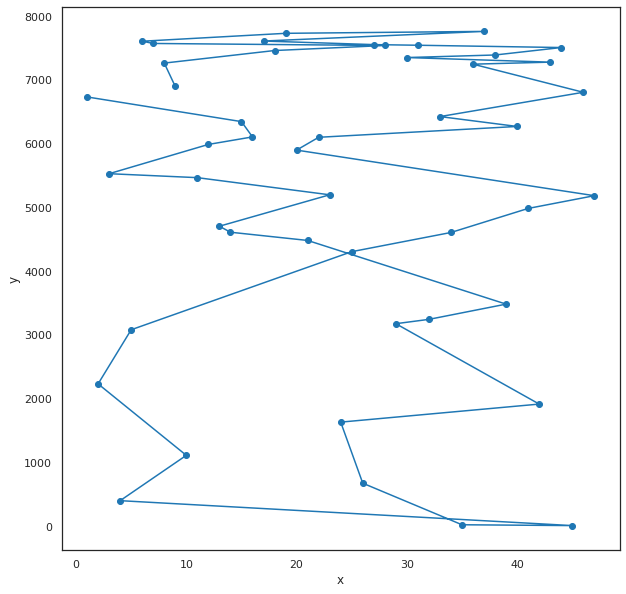

In [64]:
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0][permutation], data[:, 1][permutation])
plt.plot(data[:, 0][permutation], data[:, 1][permutation])
plt.xlabel('x')
plt.ylabel('y')
